In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

## Expression_model

In [30]:
FILE_EXP_MODEL = '../data/pdtc_L1000.csv'
exp_model = pd.read_csv(FILE_EXP_MODEL,   index_col='Gene',engine='python', encoding = "cp949")

In [31]:
exp_model

,AB521M,AB551,AB555,AB559,AB580,AB630,HCI001,HCI002,HCI004,HCI005,...,VHIO093,VHIO094,VHIO098,VHIO102,VHIO124,VHIO131,VHIO161,VHIO169,VHIO179,VHIO244
Gene,,,,,,,,,,,,,,,,,,,,,
TSPAN6,9.375324,8.186724,6.392242,8.729002,8.446460,8.719963,8.321275,8.279357,10.185631,7.548585,...,9.044141,9.263082,8.549284,9.815926,9.816616,6.900698,8.124467,8.015472,8.006466,7.882826
SCYL3,7.898678,9.342750,8.503033,8.163900,8.641279,7.621921,7.859192,8.302037,8.149598,7.730966,...,8.822842,7.417503,7.872594,7.684719,7.540178,8.310725,7.932121,7.295948,7.374216,8.833083
BAD,7.734704,7.992075,8.027239,7.927363,8.121283,8.119538,7.306796,7.918824,8.025513,8.120466,...,7.722157,7.839890,8.039698,7.973640,7.836774,7.722098,7.622659,6.984687,7.783246,8.285890
LAP3,8.826499,9.686491,9.458066,8.305553,10.019053,7.627177,9.872884,9.139693,9.134686,8.758491,...,8.469220,10.258265,9.302105,8.288386,9.680369,9.421553,10.525673,8.623467,8.636024,9.025687
SNX11,8.544662,8.445974,8.388250,7.804349,8.095522,8.152475,7.755348,7.842586,8.589673,8.818739,...,7.602661,7.917638,8.274981,7.658087,7.792381,8.738770,8.468811,8.387314,8.598639,8.856667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RBM15B,6.768391,6.337444,7.214284,6.704829,6.734503,6.711195,6.712434,6.800683,6.831970,7.421290,...,6.891590,6.888878,7.315043,6.277633,6.547600,6.923063,6.598058,6.779751,6.610200,6.938486
MRPL12,9.737291,8.446348,8.852904,8.369703,8.001979,8.326847,9.218858,9.041576,8.402863,10.066242,...,8.989196,9.597924,9.151363,9.324468,8.302843,8.873185,8.626970,9.122636,9.870840,9.507549
IKBKE,6.439331,6.685259,6.530472,6.763303,6.490142,5.984371,7.246076,8.623386,7.007307,6.888465,...,7.122844,9.053442,7.495134,6.302905,6.975862,6.708036,6.726417,7.417111,7.497370,6.538621


## Cancer Cell Line

In [33]:
FILE_CELL_MODEL = '../data/cell_line_L1000.csv'
cell_line = pd.read_csv(FILE_CELL_MODEL, index_col='Unnamed: 0' , engine='python', encoding = "cp949")

In [34]:
cell_line

,ACH-000147,ACH-000624,ACH-000028,ACH-000277,ACH-000117,ACH-000097,ACH-000212,ACH-000856,ACH-000849,ACH-000768,...,ACH-000374,ACH-000288,ACH-000711,ACH-000927,ACH-000759,ACH-000721,ACH-000934,ACH-000330,ACH-000859,ACH-000699
TSPAN6,3.975447,4.242603,2.636915,1.495695,4.050502,3.158660,5.011227,6.425258,5.595742,4.231893,...,5.890690,4.045268,5.163096,2.763412,5.835924,3.392317,2.229588,4.161888,6.007420,4.123501
SCYL3,2.739848,1.713696,2.819668,3.353323,2.985500,4.063503,1.560715,3.277985,3.173127,2.327687,...,3.177918,2.173127,2.531069,4.010780,4.221104,2.176323,2.906891,2.553361,3.484138,2.353323
BAD,6.364397,5.447910,5.946965,7.593204,5.831117,5.710944,6.590063,5.733625,6.282810,6.888256,...,5.005849,6.307246,6.652917,7.239455,5.167920,5.345893,6.515542,5.656496,5.993448,6.799864
LAP3,4.939697,4.426265,5.584662,6.975905,5.826040,5.886794,5.793376,5.106432,5.830103,6.341808,...,6.097400,6.064581,4.750070,5.456478,4.943453,5.887038,6.248117,4.555816,6.748998,5.528884
SNX11,4.239551,2.811471,4.564988,6.540089,2.811471,4.674122,3.839960,3.822730,3.886550,3.994580,...,4.084915,3.568032,4.331275,3.619413,3.632268,3.598127,4.422233,2.829850,4.042644,3.459432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RBM15B,4.089159,2.350497,3.419539,4.434295,3.854993,3.884598,4.201634,4.365273,3.921246,4.204767,...,3.456806,4.361768,4.013462,4.180307,4.535431,3.813525,4.617063,4.458119,4.495056,4.183487
MRPL12,7.157852,5.615299,6.748059,6.602736,6.703904,7.670161,7.985102,6.885330,6.943101,6.863319,...,6.810572,6.423242,7.034524,7.107374,6.169524,7.423410,6.908813,5.855990,6.798310,7.416671
IKBKE,3.090853,2.853996,0.903038,0.111031,1.395063,5.287251,2.121015,3.478972,4.124328,3.499527,...,4.476382,2.395063,2.998196,1.269033,4.314697,0.028569,2.438293,3.592158,3.368768,3.395063
DUSP14,5.062640,3.510962,3.773996,3.189034,4.755422,4.816600,5.098874,3.978196,4.896756,5.598722,...,3.851999,4.390255,4.727920,6.833396,3.324811,3.941106,4.350497,5.291309,4.614710,4.366672


## Drug response

### PDTC

In [12]:
FILE_PDTC_DRUG = '../data/DrugResponsesAUCModels.txt'
drug_res_model = pd.read_csv(FILE_PDTC_DRUG, sep = "\t",  engine='python', encoding = "cp949")

In [13]:
drug_res_model

,Model,Drug,AUC,iC50,D1_CONC,D5_CONC,perc.iC50
0,HCI001,(5Z)-7-Oxozeaenol,0.217813,5.48327034751385,7.701322,2.337740,71.507443
1,HCI001,17-AAG,0.301919,18349.7411361244,1.000000,0.003906,183.038003
2,HCI001,5-Fluorouracil,0.494210,1.3502642314527,20.000000,0.078125,51.391421
3,HCI001,681640,0.102932,152.12579956481,2.000000,0.007812,150.681089
4,HCI001,ABT-263,0.497307,0.124656353895025,2.000000,0.007812,49.591347
...,...,...,...,...,...,...,...
1631,VHIO244,Vorinostat,0.560835,0.478323131822251,10.000000,0.039062,44.636232
1632,VHIO244,XAV 939,0.080441,103327.052987666,5.581430,1.175631,702.942004
1633,VHIO244,YK 4-279,0.216032,8.69091078926115,7.701322,2.337740,79.903643
1634,VHIO244,ZM-447439,0.127893,1493729.57804505,3.275568,0.740057,587.743723


In [90]:
print("The number of drug is ",len(set(drug_res_model['Drug'])))

The number of drug is  104


In [82]:
fingerprint_model = pd.read_csv('../data/fingerprint.txt', sep = "\t",index_col= 'GDC-0449', engine='python', encoding = "cp949")

In [99]:
set([i for i in drug_res_model['Drug'] if i in fingerprint_model.index])

{'(5Z)-7-Oxozeaenol',
 '17-AAG',
 '5-Fluorouracil',
 '681640',
 'ABT-263',
 'AG-014699',
 'AICAR',
 'AKT inhibitor VIII',
 'AMG-706',
 'AZ628',
 'AZ960',
 'AZD2281',
 'AZD6482',
 'AZD7762',
 'AZD8055',
 'AZD8931',
 'Anastrozole',
 'Axitinib',
 'BI-2536',
 'BI-D1870',
 'BIBW2992',
 'BIRB 0796',
 'BMN-673',
 'BMS-345541',
 'BMS-536924',
 'BMS-708163',
 'BMS-754807',
 'BX-795',
 'BYL719',
 'Bicalutamide',
 'Bortezomib',
 'Bosutinib',
 'Bryostatin',
 'CEP-701',
 'CHIR-99021',
 'Camptothecin',
 'Carboplatin',
 'Cisplatin',
 'Cyclophosphamide',
 'Docetaxel',
 'EHT 1864',
 'EPZ004777',
 'EPZ5676',
 'Embelin',
 'Epirubicin',
 'Erlotinib',
 'Everolimus',
 'FK866',
 'Fulvestrant',
 'GDC0941',
 'GSK1120212',
 'GSK1904529A',
 'GSK2118436',
 'GSK269962A',
 'GW 441756',
 'GW843682X (AN-13)',
 'Gefitinib',
 'Gemcitibine',
 'INCB-18424',
 'JNJ-26854165',
 'JNK Inhibitor VIII',
 'JQ1',
 'KU-55933',
 'LCL161',
 'LY317615',
 'Lapatinib',
 'Lenalidomide',
 'MK-2206',
 'MLN8237',
 'NU-7441',
 'NVP-AUY922',

In [115]:
for i in range(len(drug_res_model)):
    if not drug_res_model.loc[i]['Drug'] in fingerprint_model.index:
        drug_res_model = drug_res_model.drop(i)

In [116]:
drug_res_model['finger'] = [fingerprint_model.loc[i] for i in drug_res_model['Drug'] if i in fingerprint_model.index]

In [119]:
drug_res_model[['Model','Drug','finger','AUC']]

,Model,Drug,finger,AUC
0,HCI001,(5Z)-7-Oxozeaenol,0 0 0.1 0 0.2 0 0.3 ...,0.217813
1,HCI001,17-AAG,0 0 0.1 0 0.2 0 0.3 ...,0.301919
2,HCI001,5-Fluorouracil,0 0 0.1 0 0.2 0 0.3 ...,0.494210
3,HCI001,681640,0 0 0.1 0 0.2 0 0.3 ...,0.102932
4,HCI001,ABT-263,0 0 0.1 1 0.2 0 0.3 ...,0.497307
...,...,...,...,...
1631,VHIO244,Vorinostat,0 0 0.1 0 0.2 0 0.3 ...,0.560835
1632,VHIO244,XAV 939,0 0 0.1 0 0.2 0 0.3 ...,0.080441
1633,VHIO244,YK 4-279,0 0 0.1 0 0.2 0 0.3 ...,0.216032
1634,VHIO244,ZM-447439,0 0 0.1 0 0.2 0 0.3 ...,0.127893


In [120]:
DRUG_PDTC_SAVE = '../data/drug_response_pdtc.csv'
drug_res_model.to_csv(DRUG_PDTC_SAVE, sep=',', na_rep='NaN') 

### Cell line

In [63]:
FILE_CCLE_DRUG = '../data/secondary-screen-dose-response-curve-parameters_abstract_breast.csv'
drug_res_ccle = pd.read_csv(FILE_CCLE_DRUG, index_col='Unnamed: 0',  engine='python', encoding = "cp949")

In [64]:
drug_res_ccle

,row_name,smiles,auc
27,ACH-000212,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,1.111354
32,ACH-000856,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,1.320316
47,ACH-000711,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,1.420198
69,ACH-000643,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,1.229564
73,ACH-000019,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,1.117433
...,...,...,...
693648,ACH-000927,CNC(=O)CN1CCC(CC1)Oc1cc2c(Nc3cccc(Cl)c3F)ncnc2...,0.657976
693649,ACH-000927,CNC(=O)c1cccc(c1)-c1ccc2c(nc(nc2n1)N1CCOC[C@@H...,1.000000
693650,ACH-000927,"CC1(C)CNc2cc(NC(=O)c3cccnc3NCc3ccncc3)ccc12, C...",0.845714
693651,ACH-000927,Cc1ccc(F)c(NC(=O)Nc2ccc(cc2)-c2cccc3[nH]nc(N)c...,1.000000


In [77]:
print(drug_res_model.groupby('Drug').size())
       
print("================================")
print("The number of drug with pdtc is ",len(set(drug_res_model['Drug'])))

Drug
(5Z)-7-Oxozeaenol    15
17-AAG               20
5-Fluorouracil       15
681640               20
ABT-263              20
                     ..
Vorinostat           20
XAV 939              15
YK 4-279             15
ZM-447439            20
mirin                10
Length: 104, dtype: int64
The number of drug with pdtc is  104


In [78]:
print(drug_res_ccle.groupby('smiles').size())

print("================================")
print("The number of drug with ccle is ",len(set(drug_res_ccle['smiles'])))

smiles
, NCC=C.ClCC1CO1                                                                                                                                                                            18
Brc1ccc(Cn2cncc2Cn2cc(C(=O)N3CCOCC3)c(c2)-c2cccc3ccccc23)cc1, Brc1ccc(Cn2cncc2Cn2cc(C(=O)N3CCOCC3)c(c2)-c2cccc3ccccc23)cc1, Brc1ccc(Cn2cncc2Cn2cc(C(=O)N3CCOCC3)c(c2)-c2cccc3ccccc23)cc1    22
Brc1ccc2[nH]c-3c(CC(=O)Nc4ccccc-34)c2c1, Brc1ccc2[nH]c-3c(CC(=O)Nc4ccccc-34)c2c1                                                                                                            22
Brc1ccc2[nH]c-3c(CC(=O)Nc4cccnc-34)c2c1                                                                                                                                                     21
Brc1cccc(Nc2ncnc3ccc(NC(=O)C=C)cc23)c1                                                                                                                                                      22
                                      

# Visualize Example 

In [17]:
drug_res_model[drug_res_model['Drug']=='mirin']

,Model,Drug,AUC,iC50,D1_CONC,D5_CONC,perc.iC50
174,HCI002,mirin,0.210915,33.2316755366236,100.0,0.390625,80.132887
452,HCI010,mirin,0.453856,10.2016359788931,100.0,0.390625,56.665625
808,STG143,mirin,0.083395,181755084084.959,100.0,0.390625,484.491857
910,STG195,mirin,0.407380,9.99717249289782,100.0,0.390625,58.470799
1095,STG282,mirin,0.284828,127.010609221109,100.0,0.390625,84.645822
1187,STG316,mirin,0.153136,164.861397395556,100.0,0.390625,109.015670
1289,STG335,mirin,0.457137,8.18335409062761,100.0,0.390625,54.860451
1441,VHIO169,mirin,0.203885,35.9313146331816,100.0,0.390625,80.132887
1533,VHIO179,mirin,0.134124,669.483491254295,100.0,0.390625,134.288106
1635,VHIO244,mirin,0.245509,39.4077095447554,100.0,0.390625,80.132887


In [18]:
drug_res_model[drug_res_model['Drug']=='mirin']['Model'].isin(exp_model.columns[exp_model.isnull().any()==False]).all()

True

In [35]:
exp_model.columns[exp_model.isnull().any()==False]

Index(['AB521M', 'AB551', 'AB555', 'AB559', 'AB580', 'AB630', 'HCI001',
       'HCI002', 'HCI004', 'HCI005', 'HCI006', 'HCI008', 'HCI009', 'HCI010',
       'HCI011', 'HCI014', 'IC006', 'IC007', 'STG139', 'STG139M', 'STG143',
       'STG195', 'STG201', 'STG282', 'STG316', 'STG335', 'VHIO006', 'VHIO039',
       'VHIO089', 'VHIO093', 'VHIO094', 'VHIO098', 'VHIO102', 'VHIO124',
       'VHIO131', 'VHIO161', 'VHIO169', 'VHIO179', 'VHIO244'],
      dtype='object')

In [36]:
'AB521M' in exp_model.columns[exp_model.isnull().any()==False]

True

In [37]:
#drug that deosn't contain nan value
number_model_w_o_nan = {}
for i in set(drug_res_model['Drug']):
    k = 0
    for j in drug_res_model[drug_res_model['Drug']==i]['Model']:
        if j in exp_model.columns[exp_model.isnull().any()==False]:
            k = k+1
    number_model_w_o_nan[i] = k
            
    

In [38]:
number_model_w_o_nan

{'mirin': 10,
 'GSK269962A': 20,
 'AZD8931': 5,
 'PD-173074': 20,
 'JNJ-26854165': 15,
 'AMG-706': 20,
 'BMS-708163': 20,
 'MLN8237': 5,
 'KU-55933': 20,
 'Embelin': 15,
 'Paclitaxel': 15,
 'PD-0332991': 20,
 'Nutlin-3a': 20,
 'Bicalutamide': 15,
 'BMS-754807': 20,
 'SB 216763': 20,
 'Sorafenib': 15,
 'AZD7762': 15,
 'Epirubicin': 10,
 'Bosutinib': 20,
 'GW843682X (AN-13)': 15,
 'NVP-AUY922': 5,
 'BMS-345541': 15,
 'LCL161': 10,
 'BX-795': 20,
 'BI-D1870': 6,
 'XAV 939': 15,
 'BIRB 0796': 20,
 'AZ628': 20,
 'NVP-BEZ235': 20,
 'Olaparib(1495) + Temozolomide(1375)': 6,
 'AZD8055': 20,
 'PF477736': 15,
 'Vinblastine': 20,
 'PF-02341066': 20,
 'PF-4708671': 20,
 'Docetaxel': 20,
 'YK 4-279': 15,
 'SCH772984': 6,
 'TW 37': 15,
 'Bryostatin': 6,
 'GSK1120212': 15,
 'AKT inhibitor VIII': 10,
 'PD-0325901': 20,
 '681640': 20,
 'BMN-673': 15,
 'PAC-1': 15,
 'BI-2536': 15,
 'Axitinib': 20,
 'JNK Inhibitor VIII': 20,
 'EHT 1864': 15,
 'Camptothecin': 20,
 'AZD2281': 20,
 'BIBW2992': 20,
 'Vorinos

In [39]:
drug_res_model[drug_res_model['Drug']=='AICAR']

,Model,Drug,AUC,iC50,D1_CONC,D5_CONC,perc.iC50
88,HCI002,AICAR,0.218715,1220.61133576083,1674.576271,6.541314,94.297598
178,HCI005,AICAR,0.157718,1491.15655209923,1674.576271,6.541314,97.907946
228,HCI008,AICAR,0.216823,548.016998871992,1674.576271,6.541314,79.856206
281,HCI009,AICAR,0.119187,5877.96842883645,1674.576271,6.541314,119.570033
367,HCI010,AICAR,0.415311,190.496438272064,1674.576271,6.541314,59.999292
456,HCI011,AICAR,0.122676,4057.44323158827,1674.576271,6.541314,115.959685
506,IC007,AICAR,0.175666,999.151987690618,1674.576271,6.541314,90.687250
723,STG143,AICAR,0.056803,66910.4950912864,1674.576271,6.541314,166.504557
815,STG195,AICAR,0.067968,30040.7571506863,1674.576271,6.541314,152.063165
999,STG282,AICAR,0.167533,2755402889.18114,1674.576271,6.541314,172.822665


## PCA

In [40]:
exp_model

,AB521M,AB551,AB555,AB559,AB580,AB630,HCI001,HCI002,HCI004,HCI005,...,VHIO093,VHIO094,VHIO098,VHIO102,VHIO124,VHIO131,VHIO161,VHIO169,VHIO179,VHIO244
Gene,,,,,,,,,,,,,,,,,,,,,
TSPAN6,9.375324,8.186724,6.392242,8.729002,8.446460,8.719963,8.321275,8.279357,10.185631,7.548585,...,9.044141,9.263082,8.549284,9.815926,9.816616,6.900698,8.124467,8.015472,8.006466,7.882826
SCYL3,7.898678,9.342750,8.503033,8.163900,8.641279,7.621921,7.859192,8.302037,8.149598,7.730966,...,8.822842,7.417503,7.872594,7.684719,7.540178,8.310725,7.932121,7.295948,7.374216,8.833083
BAD,7.734704,7.992075,8.027239,7.927363,8.121283,8.119538,7.306796,7.918824,8.025513,8.120466,...,7.722157,7.839890,8.039698,7.973640,7.836774,7.722098,7.622659,6.984687,7.783246,8.285890
LAP3,8.826499,9.686491,9.458066,8.305553,10.019053,7.627177,9.872884,9.139693,9.134686,8.758491,...,8.469220,10.258265,9.302105,8.288386,9.680369,9.421553,10.525673,8.623467,8.636024,9.025687
SNX11,8.544662,8.445974,8.388250,7.804349,8.095522,8.152475,7.755348,7.842586,8.589673,8.818739,...,7.602661,7.917638,8.274981,7.658087,7.792381,8.738770,8.468811,8.387314,8.598639,8.856667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RBM15B,6.768391,6.337444,7.214284,6.704829,6.734503,6.711195,6.712434,6.800683,6.831970,7.421290,...,6.891590,6.888878,7.315043,6.277633,6.547600,6.923063,6.598058,6.779751,6.610200,6.938486
MRPL12,9.737291,8.446348,8.852904,8.369703,8.001979,8.326847,9.218858,9.041576,8.402863,10.066242,...,8.989196,9.597924,9.151363,9.324468,8.302843,8.873185,8.626970,9.122636,9.870840,9.507549
IKBKE,6.439331,6.685259,6.530472,6.763303,6.490142,5.984371,7.246076,8.623386,7.007307,6.888465,...,7.122844,9.053442,7.495134,6.302905,6.975862,6.708036,6.726417,7.417111,7.497370,6.538621


In [41]:
exp_model.columns[exp_model.isnull().any()] #shit..

Index([], dtype='object')

In [42]:
exp_model.columns[exp_model.isnull().any()==False]

Index(['AB521M', 'AB551', 'AB555', 'AB559', 'AB580', 'AB630', 'HCI001',
       'HCI002', 'HCI004', 'HCI005', 'HCI006', 'HCI008', 'HCI009', 'HCI010',
       'HCI011', 'HCI014', 'IC006', 'IC007', 'STG139', 'STG139M', 'STG143',
       'STG195', 'STG201', 'STG282', 'STG316', 'STG335', 'VHIO006', 'VHIO039',
       'VHIO089', 'VHIO093', 'VHIO094', 'VHIO098', 'VHIO102', 'VHIO124',
       'VHIO131', 'VHIO161', 'VHIO169', 'VHIO179', 'VHIO244'],
      dtype='object')

In [43]:
x = exp_model.drop([i for i in exp_model.columns[exp_model.isnull().any()]],axis=1).values

In [44]:
x = StandardScaler().fit_transform(x)

In [45]:
pd.DataFrame(x, columns=exp_model.columns[exp_model.isnull().any()==False]).head()

,AB521M,AB551,AB555,AB559,AB580,AB630,HCI001,HCI002,HCI004,HCI005,...,VHIO093,VHIO094,VHIO098,VHIO102,VHIO124,VHIO131,VHIO161,VHIO169,VHIO179,VHIO244
0,0.614187,-0.131018,-1.234386,0.190368,-0.001207,0.258297,-0.088055,-0.057030,1.177745,-0.568477,...,0.425685,0.499767,0.029025,0.969232,0.946051,-0.893815,-0.243358,-0.276640,-0.313734,-0.321464
1,-0.360293,0.605150,0.055899,-0.180157,0.117068,-0.425444,-0.394227,-0.042445,-0.183507,-0.451213,...,0.276857,-0.676988,-0.404325,-0.448362,-0.554965,-0.052668,-0.366624,-0.758783,-0.737637,0.273549
2,-0.468504,-0.254972,-0.234945,-0.335250,-0.198623,-0.115583,-0.760240,-0.288878,-0.266468,-0.200778,...,-0.463375,-0.407671,-0.297312,-0.256183,-0.359398,-0.403811,-0.564945,-0.967355,-0.463396,-0.069081
3,0.252002,0.824047,0.639692,-0.087278,0.953519,-0.422171,0.940029,0.496227,0.475104,0.209449,...,0.039040,1.134303,0.511129,-0.046827,0.856214,0.609994,1.295470,0.130769,0.108364,0.394150
4,0.066010,0.034075,-0.014265,-0.415907,-0.214263,-0.095073,-0.463034,-0.337904,0.110718,0.248186,...,-0.543738,-0.358099,-0.146638,-0.466077,-0.388670,0.202682,-0.022683,-0.027474,0.083299,0.288316


In [46]:
pca = PCA(n_components=2)
printcipalComponents = pca.fit_transform(x.T)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['pc1', 'pc2'])

In [47]:
principalDf

,pc1,pc2
0,-1.784490,0.458920
1,5.144300,-3.442378
2,9.373268,6.159966
3,-5.393684,7.500521
4,5.974850,3.229616
5,-2.420801,10.776751
6,-7.059455,-1.916998
7,-4.581256,-1.034157
8,-3.551431,-0.476101
9,4.609685,-2.600511


In [48]:
AICAR_drug_response = drug_res_model[drug_res_model['Drug']=='AICAR']

In [49]:
AICAR_drug_response_wonan = AICAR_drug_response[AICAR_drug_response['Model'].isin(exp_model.columns[exp_model.isnull().any()==False])==True]

In [50]:
AICAR_drug_response_wonan

,Model,Drug,AUC,iC50,D1_CONC,D5_CONC,perc.iC50
88,HCI002,AICAR,0.218715,1220.61133576083,1674.576271,6.541314,94.297598
178,HCI005,AICAR,0.157718,1491.15655209923,1674.576271,6.541314,97.907946
228,HCI008,AICAR,0.216823,548.016998871992,1674.576271,6.541314,79.856206
281,HCI009,AICAR,0.119187,5877.96842883645,1674.576271,6.541314,119.570033
367,HCI010,AICAR,0.415311,190.496438272064,1674.576271,6.541314,59.999292
456,HCI011,AICAR,0.122676,4057.44323158827,1674.576271,6.541314,115.959685
506,IC007,AICAR,0.175666,999.151987690618,1674.576271,6.541314,90.687250
723,STG143,AICAR,0.056803,66910.4950912864,1674.576271,6.541314,166.504557
815,STG195,AICAR,0.067968,30040.7571506863,1674.576271,6.541314,152.063165
999,STG282,AICAR,0.167533,2755402889.18114,1674.576271,6.541314,172.822665


In [51]:
string_list = [i for i in AICAR_drug_response_wonan['Model']]

0.218714625253665
0.157717564183258
0.21682307183392002
0.11918656081131698
0.41531111327558795
0.122675655766856
0.175666488985261
0.0568031576706493
0.0679678995123716
0.16753290697198098
0.22197500267685
0.26057035827438396
0.24823563121849399
0.157254099002573
0.21035697814479395
0.327715638162492


Text(0.5, 1.0, 'PDTC PCA')

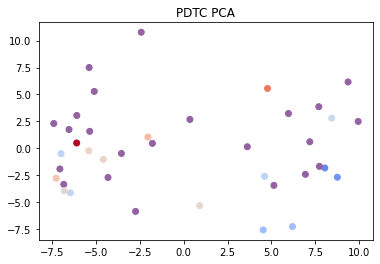

In [79]:
c_list = []
for i in exp_model.columns[exp_model.isnull().any()==False]:
    if i in string_list:
        c_list.append(plt.cm.coolwarm(float(AICAR_drug_response_wonan[AICAR_drug_response_wonan['Model']==i]['AUC'])*2.5) )  
        print(float(AICAR_drug_response_wonan[AICAR_drug_response_wonan['Model']==i]['AUC']))
    else :
        c_list.append(plt.cm.PRGn(0.18))
    
plt.scatter(principalDf['pc1'],principalDf['pc2'],c=c_list)
plt.title("PDTC PCA")